# Week11 K-Means

canerozcan.net/kmeans.html

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %% create dataset

# class1
x1 = np.random.normal(25,5,1000)
y1 = np.random.normal(25,5,1000)

# class2
x2 = np.random.normal(55,5,1000)
y2 = np.random.normal(60,5,1000)

# class3
x3 = np.random.normal(55,5,1000)
y3 = np.random.normal(15,5,1000)

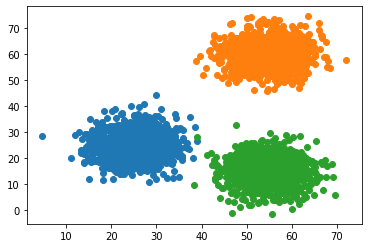

In [2]:
x = np.concatenate((x1,x2,x3),axis = 0)
y = np.concatenate((y1,y2,y3),axis = 0)
dictionary = {"x":x,"y":y}

data = pd.DataFrame(dictionary)

plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.scatter(x3,y3)
plt.show()

## %% kmeans algoritması bunu gorecek
#plt.scatter(x1,y1,color = "black")
#plt.scatter(x2,y2,color = "black")
#plt.scatter(x3,y3,color = "black")
#plt.show()

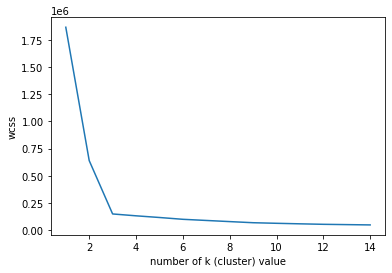

In [3]:
# %% KMEANS
## Within Clusters Sum of Square (WCSS) Türkçesi şöyle: Kümeler içi kareler toplamı
## Birbirine benzeyenler, yakın olanlar aynı kümede olsun birbirine benzemeyenlerle 
## mümkün olduğunca uzak olsunlar (yabancı düşmanlığı)
from sklearn.cluster import KMeans
wcss = []

for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,15),wcss)
plt.xlabel("number of k (cluster) value")
plt.ylabel("wcss")
plt.show()

Elbow methoduna göre grafiğe bakıldığında k değeri için 3 değerine kadar ani bir düşüş ve ardından daha seyrek bir düşüş görüyoruz. Bunun anlamı, 3 değerinin kümeleme için ideal olduğudur.

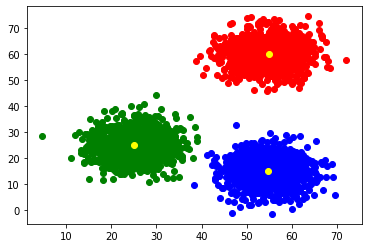

In [11]:
#%% k = 3 icin modelim

kmeans2 = KMeans(n_clusters=3)
clusters = kmeans2.fit_predict(data)

data["label"] = clusters

plt.scatter(data.x[data.label == 0 ],data.y[data.label == 0],color = "red")
plt.scatter(data.x[data.label == 1 ],data.y[data.label == 1],color = "green")
plt.scatter(data.x[data.label == 2 ],data.y[data.label == 2],color = "blue")
plt.scatter(kmeans2.cluster_centers_[:,0],kmeans2.cluster_centers_[:,1],color = "yellow")
plt.show()

In [12]:
"""
Yukarıda görüldüğü üzere bazı veriler kümelerden oldukça uzakta bulunuyor. 
Bu veriler aykırı olarak tanımlanır ve bunun tespiti yapılabilir.
Yap yani...
"""

'\nYukarıda görüldüğü üzere bazı veriler kümelerden oldukça uzakta bulunuyor. \n'